# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox

In [11]:
!pip install kaggle pyvis networkx python-igraph vaex igraph scipy

In [ ]:
import os
import json
import seaborn as sns
import networkx as nx
from matplotlib import pyplot as plt
import vaex
import kagglehub
import igraph


## Reddit Networks
Using the [Movie Dynamics Networks dataset](https://www.kaggle.com/datasets/michaelfire/movie-dynamics-over-15000-movie-social-networks) select the subreddit of your favorite  movie show. Using the data of the selected movie,
answer the following questions:

In [13]:
os.environ["KAGGLEHUB_CACHE"] = (
    "/Users/guyarieli/Documents/אוניברסיטה/כריית נתונים במאגרי מידע גדולים/עבודות"
)

path = kagglehub.dataset_download(
    "michaelfire/movie-dynamics-over-15000-movie-social-networks"
)

print("Path to dataset files:", path)

Path to dataset files: /Users/guyarieli/Documents/אוניברסיטה/כריית נתונים במאגרי מידע גדולים/עבודות/datasets/michaelfire/movie-dynamics-over-15000-movie-social-networks/versions/1


In [13]:
files_names = os.listdir(
    "./datasets/michaelfire/movie-dynamics-over-15000-movie-social-networks/versions/1/moviedynamics"
)
movies = sorted(
    [i for i in files_names if "_apes" in i.lower() and ".actors." not in i.lower()]
)
movies

['1968_Planet_of_the_Apes.json',
 '1970_Beneath_the_Planet_of_the_Apes.json',
 '1971_Escape_from_the_Planet_of_the_Apes.json',
 '1972_Conquest_of_the_Planet_of_the_Apes.json',
 '1973_Battle_for_the_Planet_of_the_Apes.json',
 '1984_Greystoke_The_Legend_of_Tarzan_Lord_of_the_Apes.json',
 '2011_Rise_of_the_Planet_of_the_Apes.json',
 '2014_Dawn_of_the_Planet_of_the_Apes.json',
 '2017_War_for_the_Planet_of_the_Apes.json']

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

{'Dom Cobb': 13,
 'Robert Fischer': 13,
 'Mr. Saito': 12,
 'Arthur': 11,
 'Old Mal': 10,
 'Zak Eames': 9,
 'Ariadne': 9,
 'Peter Browning': 9,
 'Maurice Fischer': 8,
 'James (20 months)': 8,
 'Phillipa (5 years)': 7,
 'Yusuf': 7,
 'Nash': 5,
 'Stephen Miles': 4,
 'Lawyer': 3}

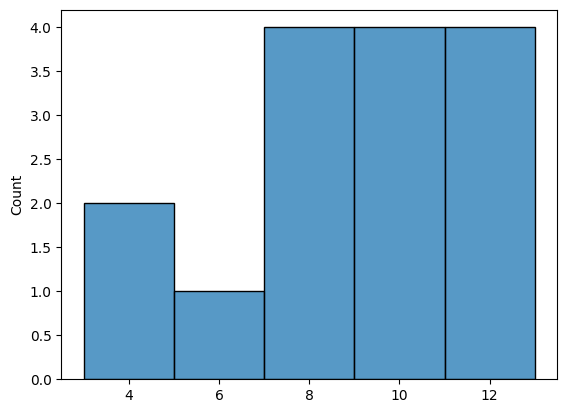

In [14]:
favorit_movie = "2010_Inception"
movie = json.load(
    open(
        f"./datasets/michaelfire/movie-dynamics-over-15000-movie-social-networks/versions/1/moviedynamics/{favorit_movie}.json"
    )
)
movie_edges = [[d['source'], d['target']] for d in movie['links']]
movie_graph = nx.Graph(movie_edges)


d = dict(movie_graph.degree())
sorted_degree = dict(sorted(d.items(), key=lambda x:x[1], reverse=True))
sns.histplot(sorted_degree)
sorted_degree

**Task 2:** Create a subgraph of the top-12 movie characters according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

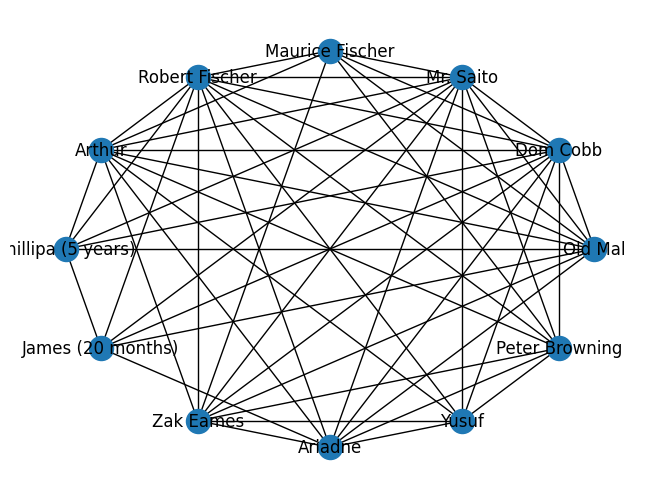

In [15]:
top = 12
centrality = dict(nx.pagerank(movie_graph))
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:top]
top12 = movie_graph.subgraph([central[0] for central in sorted_centrality])
nx.draw_circular(top12, with_labels=True)

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [19]:
print('Page Rank:',)
print(f'\t{nx.pagerank(movie_graph)}')

print('Triangles:')
print(f'\t{nx.triangles(movie_graph)}')

print('Average Shortest Path:')
print(f'\t{nx.average_shortest_path_length(movie_graph)}')

Page Rank:
	{'Old Mal': 0.07667236147430881, 'Dom Cobb': 0.09735739968379611, 'Mr. Saito': 0.08960884649440612, 'Maurice Fischer': 0.06360730142380218, 'Robert Fischer': 0.09799561261274961, 'Stephen Miles': 0.03655014447048447, 'Arthur': 0.0827655370033897, 'Phillipa (5 years)': 0.0565951894064343, 'James (20 months)': 0.0639530811921331, 'Zak Eames': 0.06861572951023337, 'Ariadne': 0.06864942030537946, 'Yusuf': 0.05512679484444104, 'Nash': 0.04231110579191827, 'Peter Browning': 0.07037893581648366, 'Lawyer': 0.029812539970039787}
Triangles:
	{'Old Mal': 32, 'Dom Cobb': 48, 'Mr. Saito': 45, 'Maurice Fischer': 22, 'Robert Fischer': 47, 'Stephen Miles': 6, 'Arthur': 39, 'Phillipa (5 years)': 17, 'James (20 months)': 20, 'Zak Eames': 32, 'Ariadne': 30, 'Yusuf': 21, 'Nash': 9, 'Peter Browning': 28, 'Lawyer': 3}
Average Shortest Path:
	1.4


**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [22]:
def plot_graph(file_path: str):
    if file_path.endswith(".gexf"):
        G = nx.read_gexf(file_path)
    elif file_path.endswith(".gml"):
        G = nx.read_gml(file_path)
    elif file_path.endswith(".graphml"):
        G = nx.read_graphml(file_path)

    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        with_labels=True,
    )
    plt.show()

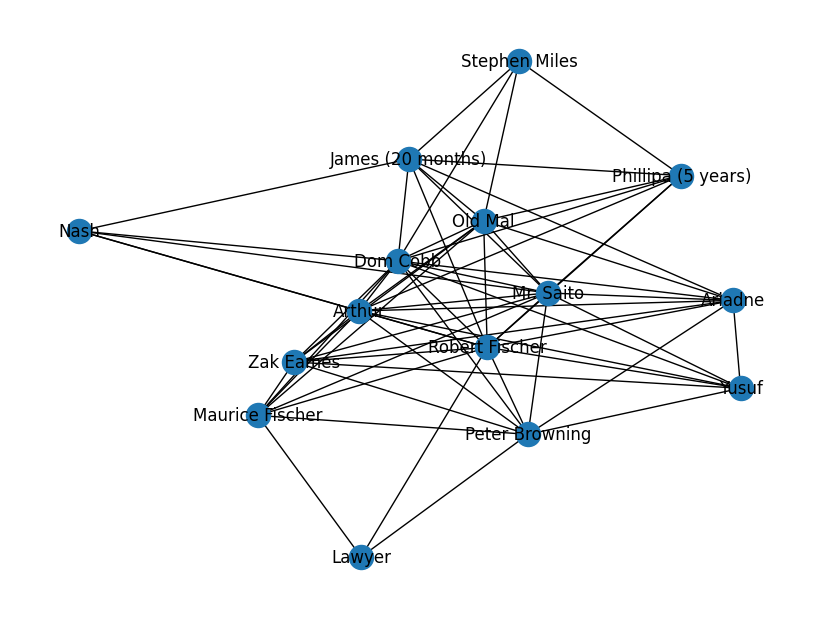

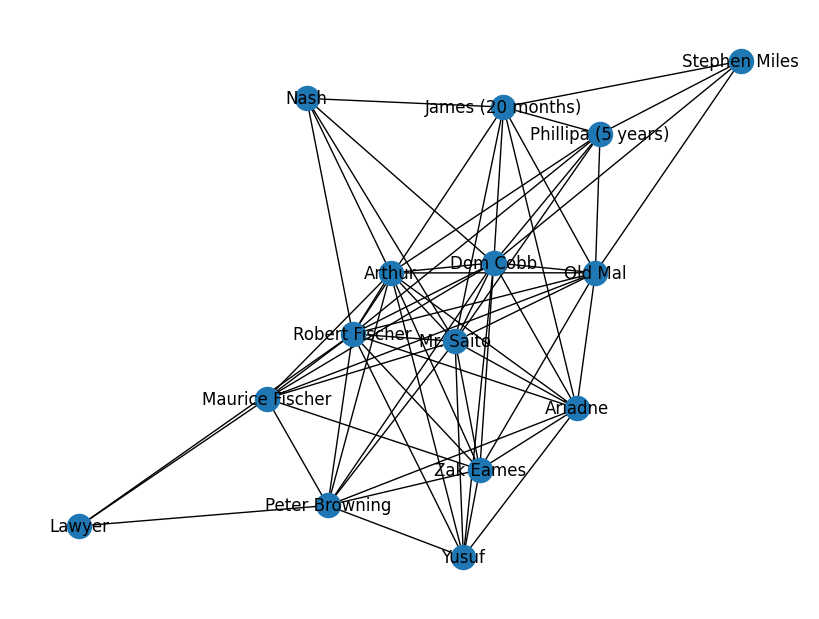

In [23]:
nx.write_gexf(movie_graph, "movie_graph.gexf")
nx.write_gml(movie_graph, "movie_graph.gml")

plot_graph("movie_graph.gexf")
plot_graph("movie_graph.gml")

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

Graph has n.10 nodes with n.39 edges


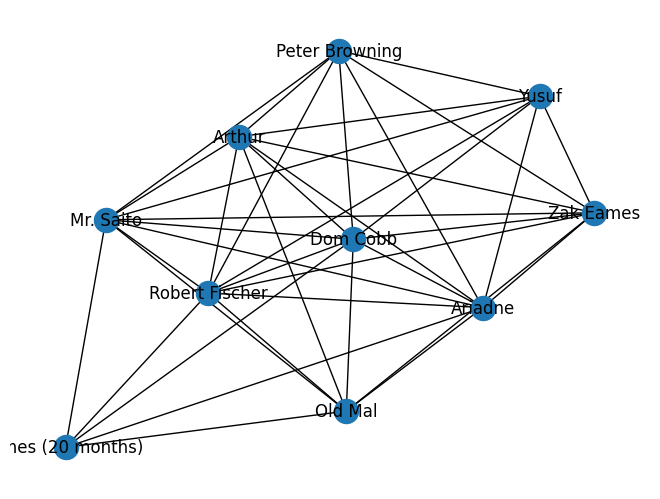

In [25]:
def subgraph_by_vertex(graph, id):
    friends = list(nx.neighbors(movie_graph, id))
    friends.append(id)
    subgraph = graph.subgraph(friends)
    return subgraph

friend_subgraph = subgraph_by_vertex(movie_graph, 'Ariadne')

nx.draw_spring(friend_subgraph, with_labels=True)

print(f"Graph has n.{len(friend_subgraph.nodes)} nodes with n.{len(friend_subgraph.edges)} edges")

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges (Tip: use SGraph or use Vaex and generate a subgraph and use igraph)

In [7]:
!wget http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
!tar -xzf fcis.tar.gz

--2025-04-14 20:53:28--  http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 2607:4000:200:12:3eec:efff:fe5e:6f68, 128.208.3.117
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|2607:4000:200:12:3eec:efff:fe5e:6f68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6852261483 (6.4G) [application/x-gzip]
Saving to: ‘fcis.tar.gz’

fcis.tar.gz         100%[===================>]   6.38G  5.28MB/s    in 15m 2s  

2025-04-14 21:08:30 (7.25 MB/s) - ‘fcis.tar.gz’ saved [6852261483/6852261483]



**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [46]:
dfv = vaex.from_csv('FCIS/fcis_chess.vertices.csv')
dfi = next(vaex.from_csv('FCIS/fcis_chess.interactions.csv', chunk_size=1e6))

dfi

#,datetime,src_id,dst_id
0,19990101T031300,ranger,game
1,19990101T031300,game,ranger
2,19990101T125100,jovanka,abpdoc
3,19990101T125100,abpdoc,jovanka
4,19990102T071500,Pepo,HugoPrat
...,...,...,...
"999,995",19991221T222300,Baysage,EColle
"999,996",19991221T222300,kevvy,tgb
"999,997",19991221T222300,basketwood,Barduka
"999,998",19991221T222300,Gandalph,Ludvig


In [67]:
def create_igraph(vertices: list, edges: list, is_directed: bool = False) -> igraph.Graph:
    ig = igraph.Graph(directed=is_directed)
    ig.add_vertices(len(vertices))
    ig.vs["name"] = vertices

    vertex_to_idx = {
        vertex: idx 
        for idx, vertex in enumerate(vertices)
    }
    edges = [
        (vertex_to_idx[src], vertex_to_idx[destenation])
        for src, destenation in edges
    ]
    ig.add_edges(edges)

    return ig

In [68]:

K = 10
chess_edges = dfi['src_id', 'dst_id'].to_pandas_df().values.tolist()
chess_graph = nx.Graph(chess_edges)
centrality = dict(nx.pagerank(chess_graph))
sorted_centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
top_k_sub_graph = [i for i, _ in sorted_centrality[:K]]
top_k_sub_graph = chess_graph.subgraph(top_k_sub_graph)
nodes, edges = list(top_k_sub_graph.nodes()), list( top_k_sub_graph.edges())
chess_igraph = create_igraph(nodes, edges)

In [71]:
print(f"Verticies n. {chess_igraph.vcount()}")
print(f"Links n. {chess_igraph.ecount()}")

Verticies n. 10
Links n. 17


### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges